# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import sys
import torch
from collections import deque
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint
from dqn_agent_banana import Agent

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="C:/Users/simon.chauvin/Documents/Private GitHub/deep-reinforcement-learning/p1_navigation/Banana_Windows_x86_64/Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# print(env_info.repr())
# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)
print(type(state))

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37
<class 'numpy.ndarray'>


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
banana_demo = True
banana_training = True

In [8]:
def dqn(n_episodes=5000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.

    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    # learn from scratch or not
    agent.qnetwork_local.load_state_dict(torch.load('checkpoint20.pth'))

    scores = []  # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start  # initialize epsilon
    for i_episode in range(1, n_episodes + 1):
        # reset the environement for a new episode
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]

        # reset metrics
        score = 0
        rewards = []
        actions = []
        changes_in_state = 0

        # run episodes
        for t in range(max_t):
            #  select an action for the current state
            action = int(agent.act(state, eps))
            
            # send the action to the environment
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)

            # monitor actions, states and rewards are not constant
            rewards.append(reward)
            actions.append(action)
            if not (next_state == state).all():
                changes_in_state = changes_in_state + 1
            
            state = next_state

            #  statistics
            score += reward                                # update the score
#             print("\r {} = i_episode\n {}, {}, {}".format(i_episode, action, reward, done),
#                   sep=' ', end='', flush=True)
            if done:                                       # exit loop if episode finished
                break
        
        # decay epsilon
        eps = max(eps_end, eps_decay * eps)
        
        # log
        scores_window.append(score)  # save most recent score
        scores.append(score)  # save most recent score        
        if i_episode % 10 == 0:
            print("\n --- Episode --- {}\n\t eps: {}\n\t score: {:.2f},\n\t rewards: {}, \n\t action: {}, \n\t changes_in_state: {}".format(
                i_episode, eps, score, Counter(rewards), Counter(actions), changes_in_state), sep=' ',
                end='\n', flush=True)
        if i_episode % 100 == 0:
            print('\n --- Episode={} ---\n eps={}\n Average Score: {:.2f}'.format(
                i_episode, eps, np.mean(scores_window)))

            print("saving weights")
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')

            fig = plt.figure()
            ax = fig.add_subplot(111)
            plt.plot(np.arange(len(scores)), scores)
            plt.ylabel('Score')
            plt.xlabel('Episode #')
            plt.show()

        if np.mean(scores_window) >= 13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode - 100,
                                                                                         np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores


 --- Episode --- 10
	 eps: 0.9511101304657719
	 score: 0.00,
	 rewards: Counter({0.0: 298, -1.0: 1, 1.0: 1}), 
	 action: Counter({1: 87, 0: 77, 2: 68, 3: 68}), 
	 changes_in_state: 300

 --- Episode --- 20
	 eps: 0.9046104802746175
	 score: 2.00,
	 rewards: Counter({0.0: 298, 1.0: 2}), 
	 action: Counter({2: 89, 0: 78, 3: 67, 1: 66}), 
	 changes_in_state: 300

 --- Episode --- 30
	 eps: 0.8603841919146962
	 score: 2.00,
	 rewards: Counter({0.0: 298, 1.0: 2}), 
	 action: Counter({0: 96, 2: 71, 3: 69, 1: 64}), 
	 changes_in_state: 300

 --- Episode --- 40
	 eps: 0.8183201210226743
	 score: 2.00,
	 rewards: Counter({0.0: 298, 1.0: 2}), 
	 action: Counter({0: 97, 1: 70, 3: 68, 2: 65}), 
	 changes_in_state: 300

 --- Episode --- 50
	 eps: 0.778312557068642
	 score: 5.00,
	 rewards: Counter({0.0: 295, 1.0: 5}), 
	 action: Counter({0: 96, 2: 79, 3: 64, 1: 61}), 
	 changes_in_state: 300

 --- Episode --- 60
	 eps: 0.7402609576967045
	 score: 1.00,
	 rewards: Counter({0.0: 299, 1.0: 1}), 
	 ac

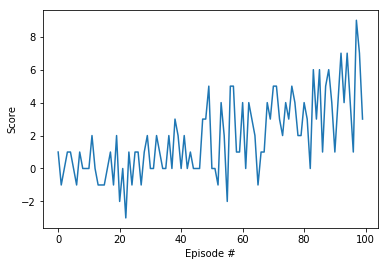


 --- Episode --- 110
	 eps: 0.5761543988830038
	 score: 5.00,
	 rewards: Counter({0.0: 293, 1.0: 6, -1.0: 1}), 
	 action: Counter({0: 105, 3: 88, 2: 71, 1: 36}), 
	 changes_in_state: 300

 --- Episode --- 120
	 eps: 0.547986285490042
	 score: 5.00,
	 rewards: Counter({0.0: 295, 1.0: 5}), 
	 action: Counter({2: 100, 0: 82, 3: 81, 1: 37}), 
	 changes_in_state: 300

 --- Episode --- 130
	 eps: 0.5211953074858876
	 score: 3.00,
	 rewards: Counter({0.0: 295, 1.0: 4, -1.0: 1}), 
	 action: Counter({0: 116, 2: 89, 3: 57, 1: 38}), 
	 changes_in_state: 300

 --- Episode --- 140
	 eps: 0.49571413690105054
	 score: 6.00,
	 rewards: Counter({0.0: 294, 1.0: 6}), 
	 action: Counter({0: 107, 2: 94, 3: 62, 1: 37}), 
	 changes_in_state: 300

 --- Episode --- 150
	 eps: 0.47147873742168567
	 score: 7.00,
	 rewards: Counter({0.0: 293, 1.0: 7}), 
	 action: Counter({0: 136, 2: 63, 3: 61, 1: 40}), 
	 changes_in_state: 300

 --- Episode --- 160
	 eps: 0.4484282034609769
	 score: 5.00,
	 rewards: Counter({0.0

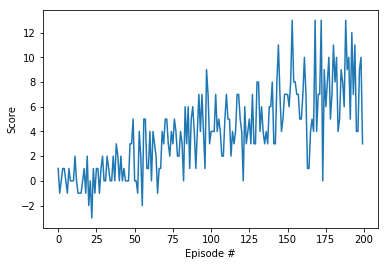


 --- Episode --- 210
	 eps: 0.34901730169741024
	 score: 6.00,
	 rewards: Counter({0.0: 294, 1.0: 6}), 
	 action: Counter({0: 147, 2: 75, 3: 52, 1: 26}), 
	 changes_in_state: 300

 --- Episode --- 220
	 eps: 0.33195389135223546
	 score: 11.00,
	 rewards: Counter({0.0: 289, 1.0: 11}), 
	 action: Counter({0: 141, 3: 75, 2: 63, 1: 21}), 
	 changes_in_state: 300

 --- Episode --- 230
	 eps: 0.3157247089126454
	 score: 0.00,
	 rewards: Counter({0.0: 300}), 
	 action: Counter({3: 121, 2: 95, 0: 56, 1: 28}), 
	 changes_in_state: 300

 --- Episode --- 240
	 eps: 0.30028896908517405
	 score: 6.00,
	 rewards: Counter({0.0: 295, 1.0: 4, 2.0: 1}), 
	 action: Counter({2: 111, 3: 91, 0: 82, 1: 16}), 
	 changes_in_state: 300

 --- Episode --- 250
	 eps: 0.285607880564032
	 score: 6.00,
	 rewards: Counter({0.0: 294, 1.0: 6}), 
	 action: Counter({0: 118, 2: 84, 3: 69, 1: 29}), 
	 changes_in_state: 300

 --- Episode --- 260
	 eps: 0.27164454854530906
	 score: 10.00,
	 rewards: Counter({0.0: 288, 1.0: 1

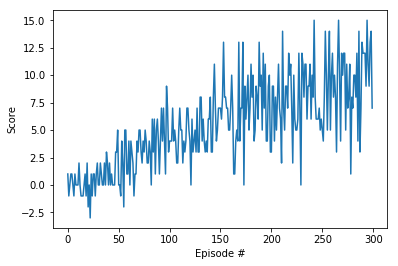


 --- Episode --- 310
	 eps: 0.21142436319205632
	 score: 12.00,
	 rewards: Counter({0.0: 288, 1.0: 12}), 
	 action: Counter({0: 141, 3: 77, 2: 65, 1: 17}), 
	 changes_in_state: 300

 --- Episode --- 320
	 eps: 0.2010878536592394
	 score: 15.00,
	 rewards: Counter({0.0: 283, 1.0: 16, -1.0: 1}), 
	 action: Counter({0: 195, 2: 47, 3: 34, 1: 24}), 
	 changes_in_state: 300

 --- Episode --- 330
	 eps: 0.1912566947289212
	 score: 12.00,
	 rewards: Counter({0.0: 288, 1.0: 12}), 
	 action: Counter({0: 174, 2: 58, 3: 57, 1: 11}), 
	 changes_in_state: 300

 --- Episode --- 340
	 eps: 0.18190617987607657
	 score: 12.00,
	 rewards: Counter({0.0: 288, 1.0: 12}), 
	 action: Counter({0: 177, 2: 57, 3: 51, 1: 15}), 
	 changes_in_state: 300

 --- Episode --- 350
	 eps: 0.1730128104744653
	 score: 10.00,
	 rewards: Counter({0.0: 290, 1.0: 10}), 
	 action: Counter({0: 175, 2: 52, 3: 52, 1: 21}), 
	 changes_in_state: 300

 --- Episode --- 360
	 eps: 0.16455423674261854
	 score: 12.00,
	 rewards: Counter(

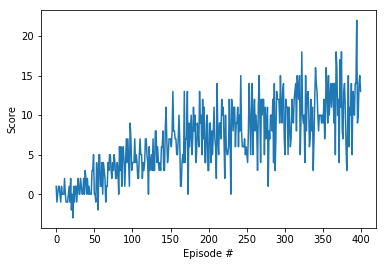


 --- Episode --- 410
	 eps: 0.12807462877562611
	 score: 14.00,
	 rewards: Counter({0.0: 286, 1.0: 14}), 
	 action: Counter({0: 205, 2: 42, 3: 40, 1: 13}), 
	 changes_in_state: 300

 --- Episode --- 420
	 eps: 0.12181307688414106
	 score: 4.00,
	 rewards: Counter({0.0: 296, 1.0: 4}), 
	 action: Counter({0: 129, 3: 90, 2: 73, 1: 8}), 
	 changes_in_state: 300

 --- Episode --- 430
	 eps: 0.11585765144771248
	 score: 13.00,
	 rewards: Counter({0.0: 287, 1.0: 13}), 
	 action: Counter({0: 188, 3: 53, 2: 50, 1: 9}), 
	 changes_in_state: 300

 --- Episode --- 440
	 eps: 0.11019338598389174
	 score: 13.00,
	 rewards: Counter({0.0: 287, 1.0: 13}), 
	 action: Counter({0: 187, 3: 43, 2: 37, 1: 33}), 
	 changes_in_state: 300

 --- Episode --- 450
	 eps: 0.10480604571960442
	 score: 17.00,
	 rewards: Counter({0.0: 283, 1.0: 17}), 
	 action: Counter({0: 195, 2: 52, 3: 48, 1: 5}), 
	 changes_in_state: 300

 --- Episode --- 460
	 eps: 0.0996820918179746
	 score: 10.00,
	 rewards: Counter({0.0: 290, 1

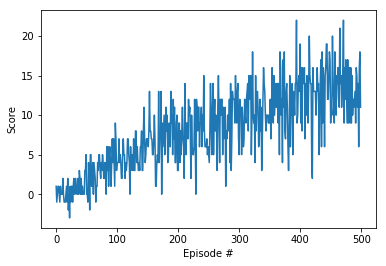


 --- Episode --- 510
	 eps: 0.07758382377679894
	 score: 10.00,
	 rewards: Counter({0.0: 290, 1.0: 10}), 
	 action: Counter({0: 208, 3: 48, 2: 37, 1: 7}), 
	 changes_in_state: 300

 --- Episode --- 520
	 eps: 0.07379076075438468
	 score: 15.00,
	 rewards: Counter({0.0: 285, 1.0: 15}), 
	 action: Counter({0: 211, 2: 46, 3: 36, 1: 7}), 
	 changes_in_state: 300

 --- Episode --- 530
	 eps: 0.07018314008827135
	 score: 18.00,
	 rewards: Counter({0.0: 282, 1.0: 18}), 
	 action: Counter({0: 216, 2: 39, 3: 38, 1: 7}), 
	 changes_in_state: 300

 --- Episode --- 540
	 eps: 0.0667518955258533
	 score: 13.00,
	 rewards: Counter({0.0: 285, 1.0: 14, -1.0: 1}), 
	 action: Counter({0: 231, 3: 31, 2: 27, 1: 11}), 
	 changes_in_state: 300

 --- Episode --- 550
	 eps: 0.06348840406243188
	 score: 10.00,
	 rewards: Counter({0.0: 290, 1.0: 10}), 
	 action: Counter({0: 169, 3: 61, 2: 54, 1: 16}), 
	 changes_in_state: 300

 --- Episode --- 560
	 eps: 0.06038446427088321
	 score: 14.00,
	 rewards: Counter({

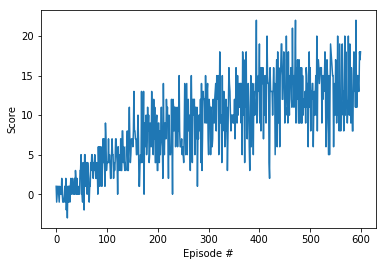


 --- Episode --- 610
	 eps: 0.046997986793891174
	 score: 9.00,
	 rewards: Counter({0.0: 289, 1.0: 10, -1.0: 1}), 
	 action: Counter({0: 159, 3: 64, 2: 64, 1: 13}), 
	 changes_in_state: 300

 --- Episode --- 620
	 eps: 0.04470026135116646
	 score: 13.00,
	 rewards: Counter({0.0: 287, 1.0: 13}), 
	 action: Counter({0: 206, 3: 48, 2: 43, 1: 3}), 
	 changes_in_state: 300

 --- Episode --- 630
	 eps: 0.04251487140556204
	 score: 11.00,
	 rewards: Counter({0.0: 285, 1.0: 13, -1.0: 2}), 
	 action: Counter({0: 216, 3: 37, 2: 27, 1: 20}), 
	 changes_in_state: 300

 --- Episode --- 640
	 eps: 0.04043632488927963
	 score: 15.00,
	 rewards: Counter({0.0: 285, 1.0: 15}), 
	 action: Counter({0: 225, 2: 37, 3: 29, 1: 9}), 
	 changes_in_state: 300

 --- Episode --- 650
	 eps: 0.03845939824099909
	 score: 17.00,
	 rewards: Counter({0.0: 283, 1.0: 17}), 
	 action: Counter({0: 205, 3: 53, 2: 39, 1: 3}), 
	 changes_in_state: 300

 --- Episode --- 660
	 eps: 0.03657912327863173
	 score: 18.00,
	 rewards:

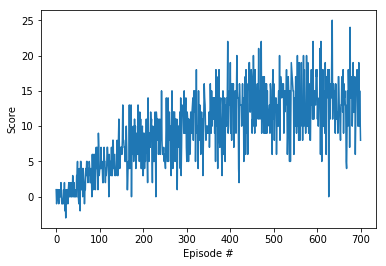


 --- Episode --- 710
	 eps: 0.028469990974320916
	 score: 15.00,
	 rewards: Counter({0.0: 285, 1.0: 15}), 
	 action: Counter({0: 215, 3: 60, 2: 22, 1: 3}), 
	 changes_in_state: 300

 --- Episode --- 720
	 eps: 0.02707809682994571
	 score: 18.00,
	 rewards: Counter({0.0: 282, 1.0: 18}), 
	 action: Counter({0: 235, 3: 33, 2: 29, 1: 3}), 
	 changes_in_state: 300


KeyboardInterrupt: 

In [9]:
if banana_training:
    # load the weights from file
    agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))
    scores = dqn()

    # plot the scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

In [ ]:
pprint(scores)

Watch the agent after learning

In [16]:
# ToDo: make sure the weigths are loaded

In [12]:
if banana_demo:
    # load the weights from file
    agent.qnetwork_local.load_state_dict(torch.load('checkpoint20.pth'))

    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
    #     action = np.random.randint(action_size)        # select an action
        action = int(agent.act(state))  # type(act) = numpy.int64 (but expected is <class 'int'>)
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
    #     if i_episode % 10 == 0:
        print("\r {}, {}, {}.".format(action, reward, done), end="")
        sys.stdout.flush()
        if done:                                       # exit loop if episode finished
            break

    print("Score: {}".format(score))

 0, 0.0, True..Score: 23.0


In [14]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```